In [1]:
import pandas as pd

import os
import shutil
import glob

import json

import numpy as np
from PIL import Image, ImageDraw
import requests
from io import BytesIO
import requests
from urllib.parse import urlencode
import re
import random
import requests

import easyocr

from tqdm import tqdm

from utils import generate_image, INP_MODELS, VAES, get_models, get_samplers

In [2]:
INPUT_CSV = f"/home/jjjj/Downloads/Game Icons 15.09 - with_image.csv"
OUT_PATH = "/home/jjjj/Documents/gallery_view/IMGS_22.11/without"
ALL_IMGS = "/home/jjjj/Pictures/ALL_IMGS" 

IMGS_COMPLETE = "/home/jjjj/Pictures/9_09_NEW"
IMGS_COMPLETE_2 = "/home/jjjj/Documents/new"

In [3]:
xl = pd.read_csv(INPUT_CSV)
imgs_complete_name = [i[:-4] for i in os.listdir(ALL_IMGS)]
eader = easyocr.Reader(['en'])

In [4]:
frame_around_size = 10

out_data = {}

for i in tqdm(range(len(xl))):
    i = xl.loc[i]
    if not isinstance(i['name'], str):
        continue
    if i['provider'] in ["pragmaticplaylive", "hogaming", "xprogaming", "ezugi", "vivogaming"]:
        continue
    name = i['name'].strip().lower().replace('`', "'")
    
    if i['provider'] == 'relaxgamingslots':
        name = name.replace('mobile', '').strip()
    if name in imgs_complete_name:
        img = Image.open(os.path.join(ALL_IMGS, name + ".png"))
        base_height = 544
        wpercent = (base_height / float(img.size[1]))
        wsize = int((float(img.size[1]) * float(wpercent)))
        img = img.resize((wsize, base_height))
        
        new_img = img.copy()
        h = img.size[1]
        mask = Image.new("L", img.size)
        draw = ImageDraw.Draw(mask)
        result = eader.readtext(np.array(new_img))
        out_data[name] = []
        for i in result:
            i = i[0]
            mean_value = np.array(i).mean(axis=0)
            c = []
            for j in i:
                c.append([])
                if j[0] < mean_value[0]:
                    c[-1].append(j[0] - frame_around_size * 10)
                else:
                    c[-1].append(j[0] + frame_around_size * 10)
        
                if j[1] < mean_value[1]:
                    c[-1].append(j[1] - frame_around_size)
                else:
                    c[-1].append(j[1] + frame_around_size)
        
            if np.array(c)[:, 1].min() < h // 2:
                continue
            out_data[name].append([(int(a), int(b)) for a, b in c])
    else:
        pass

100%|██████████| 1605/1605 [02:01<00:00, 13.24it/s]


In [5]:
name_provider = {}

for i in tqdm(range(len(xl))):
    i = xl.loc[i]
    if not isinstance(i['name'], str):
        continue
    if i['provider'] in ["pragmaticplaylive", "hogaming", "xprogaming", "ezugi", "vivogaming"]:
        continue
    name = i['name'].strip().lower().replace('`', "'")
    
    if i['provider'] == 'relaxgamingslots':
        name = name.replace('mobile', '').strip()
    
    name_provider[name] = i['provider']

100%|██████████| 1605/1605 [00:00<00:00, 13250.70it/s]


In [6]:
out_data

{'wild blood 2': [[(-35, 299), (481, 299), (481, 411), (-35, 411)],
  [(277, 303), (609, 303), (609, 467), (277, 467)],
  [(-60, 376), (460, 376), (460, 470), (-60, 470)],
  [(100, 460), (446, 460), (446, 508), (100, 508)]],
 'wild falls': [[(48, 298), (512, 298), (512, 398), (48, 398)],
  [(35, 367), (523, 367), (523, 471), (35, 471)],
  [(100, 460), (398, 460), (398, 510), (100, 510)],
  [(206, 460), (446, 460), (446, 508), (206, 508)]],
 'wild frames': [[(-31, 295), (595, 295), (595, 423), (-31, 423)],
  [(3, 391), (545, 391), (545, 471), (3, 471)],
  [(100, 460), (446, 460), (446, 508), (100, 508)]],
 'wild melon': [[(-20, 306), (446, 306), (446, 400), (-20, 400)],
  [(-25, 361), (579, 361), (579, 465), (-25, 465)],
  [(100, 460), (398, 460), (398, 510), (100, 510)],
  [(206, 460), (446, 460), (446, 508), (206, 508)]],
 'the king of heroes': [[(-57, 296), (426, 296), (426, 400), (-57, 400)],
  [(248, 300), (600, 300), (600, 398), (248, 398)],
  [(-49, 369), (599, 369), (599, 475), 

In [7]:
import textwrap

In [8]:
t = 0

for i in out_data:
    name = i
    bb = out_data[i]
    n = len(bb) - 1
    t += 1
    if min(map(len, name.split(" "))) <= 2 and n >= len(name.split(" ")):
        n -= 1
    if t == 67:
        break

In [18]:
for i in bb:
    j = [j[1] for j in i]
    print(max(j) - min(j))

96
100
56


In [9]:
i, n

('fire hot 5', 2)

In [10]:
l = len(name)
s = textwrap.wrap(name, l)
while len(s) < n or min(map(len, s)) == 1:
    l -= 1
    s = textwrap.wrap(name, l)
    print(s, l)

['fire hot', '5'] 9
['fire hot', '5'] 8
['fire', 'hot 5'] 7


In [12]:
[25, 35, 40] + [10 for _ in range(3 - 3)]

[25, 35, 40]

In [92]:
min(map(len, s)) > 1

False

In [85]:
min(map(len, name.split(" ")))

1

In [81]:
len(name)

10

In [82]:
s

['fire hot 5']

In [83]:
n

2

In [84]:
len(s) != n

True

In [59]:
out_data[i]

[[(39, 295), (517, 295), (517, 401), (39, 401)],
 [(-27, 369), (575, 369), (575, 475), (-27, 475)],
 [(98, 458), (446, 458), (446, 510), (98, 510)]]

In [60]:
n

2

In [61]:
name

'wild blood'

In [46]:
def get_provider(name):
    return name_provider[name]
    

In [47]:
get_provider('candy monsta')

'bgaming'

In [18]:
name = "book of demi gods iii reloaded"

In [30]:
for i in os.listdir("/home/jjjj/Documents/gallery_view/IMGS_22.11/V1R"):
    print(i, max(textwrap.wrap(i, max(len(i) // 3 + 2, max(map(len, i.split(" "))) + 1), max_lines=3)))

fairytale fortune fortune
starlight christmas starlight
little bighorn little
guardian of ra of ra
fury of odin megaways odin
bamboo wilds wilds
1 reel mammoth mammoth
book of piggy bank - riches piggy bank
witches wild brew witches
1 reel demi gods ii gods ii
lucky fortune cat lucky
the dragon tiger tiger
book of demi gods ii gods ii
magic fruits 4 magic
sunlight princess sunlight
champions of mithrune of
journey to the west west
cats and cash cats
captain glum: pirate hunter glum: [...]
benji killed in vegas vegas
rotiki rotiki
wild north wild
lady of the moon the
tales of egypt tales
lucky fish lucky
troll hunters 2 troll
jane hunter and the mask of montezuma of montezuma
aztec magic magic
aztec luck luck
wild wild riches megaways wild wild
john hunter and the tomb of the scarab queen the tomb of the
african sunset 2 sunset 2
black hawk deluxe hawk
wisdom of athena wisdom
happy hooves hooves
pixies vs pirates vs
fortune rewind rewind
pearl diver pearl
crazy cows crazy
highschool man

ValueError: placeholder too large for max width

In [31]:
i

'hex'

In [32]:
max(map(len, i.split(" "))) + 1

4

In [33]:
textwrap.wrap(i, max(map(len, i.split(" "))) + 1, max_lines=3)

ValueError: placeholder too large for max width

In [39]:
textwrap.wrap(i, 4, max_lines=1)

ValueError: placeholder too large for max width

In [35]:
len(i)

3

In [9]:
len(out_data['candy monsta'])

3

In [10]:
bb = out_data['candy monsta']
bb

[[(-16, 300), (554, 300), (554, 396), (-16, 396)],
 [(-57, 366), (612, 366), (612, 472), (-57, 472)],
 [(110, 460), (436, 460), (436, 508), (110, 508)]]

In [11]:
sorted(bb, key=lambda x: x[0][1])

[[(-16, 300), (554, 300), (554, 396), (-16, 396)],
 [(-57, 366), (612, 366), (612, 472), (-57, 472)],
 [(110, 460), (436, 460), (436, 508), (110, 508)]]

In [12]:
name = "candy monsta"
name

'candy monsta'

In [13]:
name.split(" ")

['candy', 'monsta']

In [ ]:
xl

In [ ]:
with open("bboxes.json", "w") as t:
    json.dump(out_data, t)

|100 случайных

In [17]:
INPUT_IMGS = "/home/jjjj/Documents/gallery_view/IMGS_22.11/V1R"
OUT_PATH = "/home/jjjj/gallery_view/100"

for i in random.choices(os.listdir(INPUT_IMGS), k=100):
    name = random.choice(os.listdir(os.path.join(INPUT_IMGS, i)))
    shutil.copy(os.path.join(INPUT_IMGS, i, name), os.path.join(OUT_PATH, name))

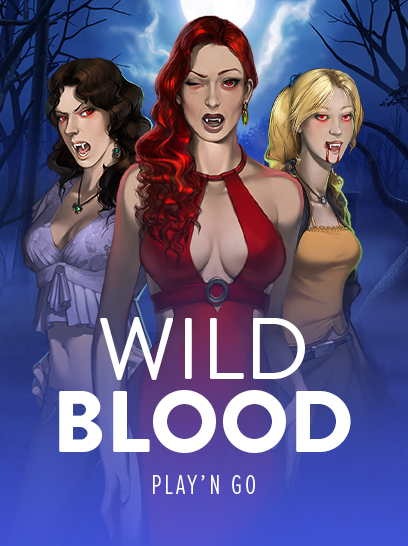

In [10]:
img

In [ ]:
img.save('somepic.jpg')


In [9]:
out_data

[['wild blood 2',
  [[-60, 296], [480, 296], [480, 464], [-60, 464]],
  [[-74, 378], [372, 378], [372, 472], [-74, 472]],
  [[48, 460], [362, 460], [362, 510], [48, 510]]],
 ['wild falls',
  [[6, 300], [414, 300], [414, 398], [6, 398]],
  [[-3, 369], [421, 369], [421, 473], [-3, 473]],
  [[48, 462], [362, 462], [362, 510], [48, 510]]],
 ['wild frames',
  [[-53, 297], [479, 297], [479, 425], [-53, 425]],
  [[-27, 394], [435, 394], [435, 470], [-27, 470]],
  [[50, 462], [362, 462], [362, 510], [50, 510]]],
 ['wild melon',
  [[-44, 306], [362, 306], [362, 402], [-44, 402]],
  [[-48, 368], [462, 368], [462, 466], [-48, 466]],
  [[48, 462], [362, 462], [362, 510], [48, 510]]],
 ['the king of heroes',
  [[-76, 300], [478, 300], [478, 400], [-76, 400]],
  [[-65, 371], [477, 371], [477, 475], [-65, 475]],
  [[26, 462], [384, 462], [384, 512], [26, 512]]],
 ['candy monsta',
  [[-40, 302], [450, 302], [450, 398], [-40, 398]],
  [[-71, 369], [487, 369], [487, 473], [-71, 473]],
  [[56, 462], [354

In [5]:
sampler = get_samplers()[0]
steps = 30
cfg_scale = 7.5
denoising_strength = 0.75
batch_size = 1

In [6]:
prompt = "cool, detailed, 4k"

neg_propmpt = "text, logo, text on image, NSFW, numbers, digits"

In [9]:
frame_around_size = 10
already_imgs = [i[:-4] for i in os.listdir(OUT_PATH)]

for i in tqdm(range(len(xl))):
    i = xl.loc[i]
    if not isinstance(i['name'], str):
        continue
    if i['provider'] in ["pragmaticplaylive", "hogaming", "xprogaming", "ezugi", "vivogaming"]:
        continue
    name = i['name'].strip().lower().replace('`', "'")
    
    if i['provider'] == 'relaxgamingslots':
        name = name.replace('mobile', '').strip()
    if name in already_imgs:
        continue

    if name in imgs_complete_name:
        img = Image.open(os.path.join(ALL_IMGS, name + ".png"))
        new_img = img.copy()
        h = img.size[1]
        mask = Image.new("L", img.size)
        draw = ImageDraw.Draw(mask)
        result = eader.readtext(np.array(new_img))

        for i in result:
            i = i[0]
            mean_value = np.array(i).mean(axis=0)
            c = []
            for j in i:
                c.append([])
                if j[0] < mean_value[0]:
                    c[-1].append(j[0] - frame_around_size * 10)
                else:
                    c[-1].append(j[0] + frame_around_size * 10)
        
                if j[1] < mean_value[1]:
                    c[-1].append(j[1] - frame_around_size)
                else:
                    c[-1].append(j[1] + frame_around_size)
        
            if np.array(c)[:, 1].min() < h // 2:
                continue
            draw.polygon([tuple(x) for x in c], fill="white")
        
        mask = np.array(mask).astype(np.uint8)
        imgs = generate_image(
            np.array(img), mask, INP_MODELS[1], VAES[-1], prompt, neg_propmpt, sampler, steps, cfg_scale, denoising_strength, batch_size
        )
        imgs[0].save(os.path.join(OUT_PATH, name + ".png"))
    else:
        pass

100%|██████████| 1605/1605 [1:02:41<00:00,  2.34s/it]  


In [5]:
img = Image.open("/home/jjjj/Pictures/ALL_IMGS/wild water.png")

In [6]:

new_img = img.copy()
result = eader.readtext(np.array(new_img))

In [7]:
frame_around_size = 10
h = 546


In [19]:
sampler = get_samplers()[0]
steps = 30
cfg_scale = 7.5
denoising_strength = 0.75
batch_size = 1

In [8]:
mask = Image.new("L", img.size)
draw = ImageDraw.Draw(mask)
frame_around_size = int(frame_around_size)

for i in result:
    i = i[0]
    mean_value = np.array(i).mean(axis=0)
    c = []
    for j in i:
        c.append([])
        if j[0] < mean_value[0]:
            c[-1].append(j[0] - frame_around_size)
        else:
            c[-1].append(j[0] + frame_around_size)

        if j[1] < mean_value[1]:
            c[-1].append(j[1] - frame_around_size)
        else:
            c[-1].append(j[1] + frame_around_size)

    if np.array(c)[:, 1].min() < h // 2:
        continue
    draw.polygon([tuple(x) for x in c], fill="white")
    
mask = np.array(mask).astype(np.uint8)

Image.fromarray(mask).save("mask_delete_text.png")
img.save("img_delete_text.png")

In [9]:
INP_MODELS

['DreamShaper/dreamshaper_8Inpainting.safetensors',
 'ReV Animated/revAnimated_v121Inp-inpainting.safetensors [8836c40038]']

In [10]:
VAES

['None',
 'klF8Anime2_klF8Anime2VAE.pt',
 'flatpiecexlVAE_baseonA1579.safetensors',
 'xlVAEC_e7.safetensors',
 'sdxlVae_v1.safetensors',
 'color101VAE_v1.safetensors']

In [11]:
get_models()

['v1-5-pruned-emaonly.safetensors [6ce0161689]',
 'blue_pencil-XL/bluePencilXL_v100.safetensors',
 'Copax TimeLessXL - SDXL1.0/copaxTimelessxlSDXL1_v8.safetensors',
 'DreamShaper/dreamshaper_8Inpainting.safetensors',
 'DucHaiten-AIart-SDXL/duchaitenAiartSDXL_v20.safetensors',
 'DynaVision XL - All-in-one stylized 3D SFW and NSFW output, no refiner needed!/dynavisionXLAllInOneStylized_release0557Bakedvae.safetensors',
 'Juggernaut XL/juggernautXL_version6Rundiffusion.safetensors',
 'ReV Animated/revAnimated_v121Inp-inpainting.safetensors [8836c40038]',
 'ReV Animated/revAnimated_v122EOL.safetensors',
 'WyvernMix (1.5 & XL)/wyvernmix15XL_xlV18.safetensors']

In [12]:
sampler = get_samplers()[0]
steps = 30
cfg_scale = 7.5
denoising_strength = 0.75
batch_size = 1

In [13]:
imgs = generate_image(
    np.array(img), mask, INP_MODELS[1], VAES[-1], "", "", sampler, steps, cfg_scale, denoising_strength, batch_size
    )

In [16]:
imgs[0].save("123.png")